In [11]:
import pandas as pd
import numpy as np

In [12]:
df = pd.read_csv('Iris.csv') 

In [14]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [16]:
df = df.iloc[:,1:]

In [17]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [18]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [19]:
df['Species'] = le.fit_transform(df['Species'])

In [20]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


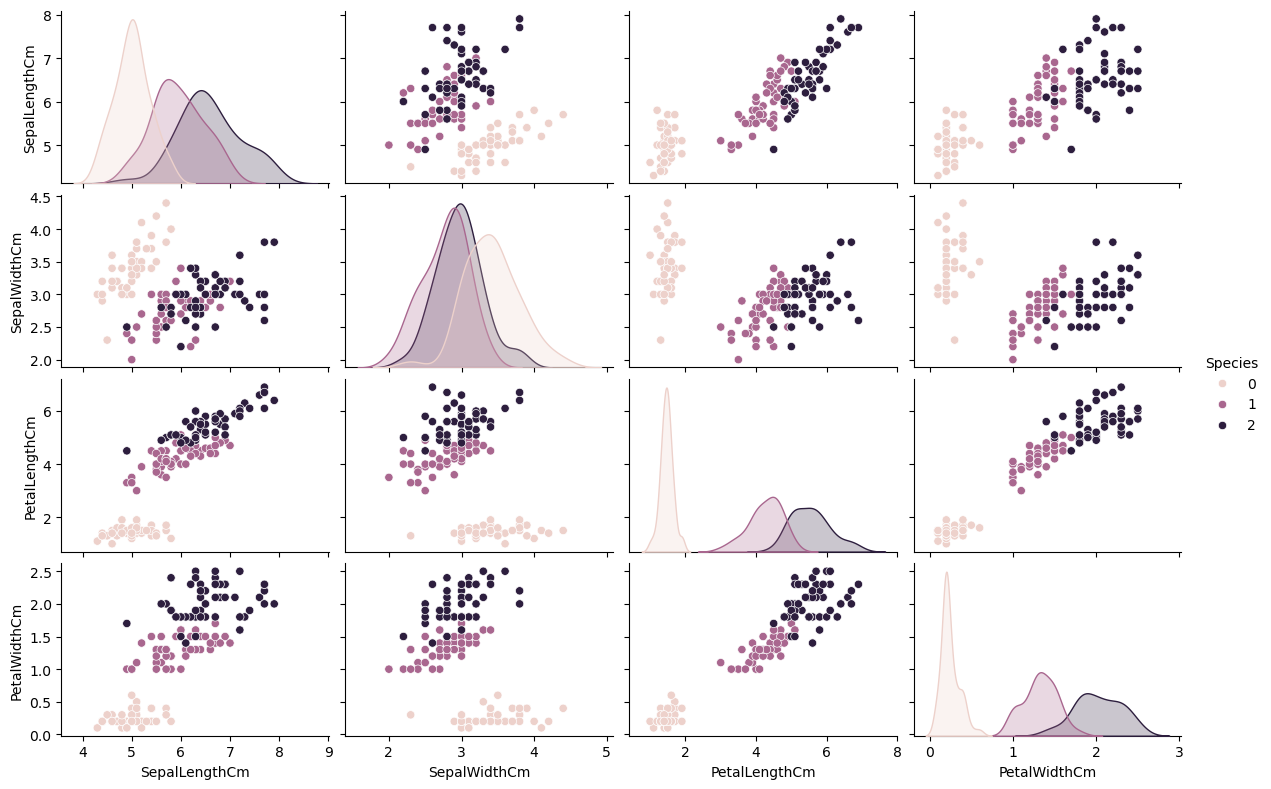

In [23]:
import seaborn as sns

sns.pairplot(df, hue='Species',height=2, aspect=1.5)

In [27]:
new_df = df[df['Species'] != 0][['SepalLengthCm','SepalWidthCm','Species']]

In [29]:
new_df.sample(5)

,SepalLengthCm,SepalWidthCm,Species
114,5.8,2.8,2
87,6.3,2.3,1
70,5.9,3.2,1
107,7.3,2.9,2
69,5.6,2.5,1


In [39]:
X = new_df.iloc[:, 0:2]
y = new_df.iloc[:, 2]

In [44]:
X.shape, y.shape

((100, 2), (100,))

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

In [41]:
clf1 = LogisticRegression()
clf2 = KNeighborsClassifier()
clf3 = RandomForestClassifier()


In [42]:
estimators = [('LogisticRegression', clf1),('KNeighborsClassifier', clf2),('RandomForestClassifier', clf3)]

In [45]:
for estimator in estimators:
    scores = cross_val_score(estimator[1], X, y, cv=10, scoring='accuracy')
    print(estimator[0], np.round(np.mean(scores), 2))

LogisticRegression 0.75
KNeighborsClassifier 0.62
RandomForestClassifier 0.62


In [46]:
from sklearn.ensemble import VotingClassifier

Hard Voting

In [48]:
vt = VotingClassifier(estimators=estimators)
x = cross_val_score(vt, X, y, cv=10, scoring='accuracy')
print('VotingClassifier', np.round(np.mean(x), 2))

VotingClassifier 0.68


Soft Voting

In [53]:
vt = VotingClassifier(estimators=estimators, voting='soft')
x = cross_val_score(vt, X, y, cv=10, scoring='accuracy')
print('VotingClassifier', np.round(np.mean(x), 2))

VotingClassifier 0.65


Weighted Voting

In [55]:
for i in range(1,4):
    for j in range(1,4):
        for k in range(1,4):
            vc = VotingClassifier(estimators=estimators, voting='soft', weights=[i, j, k])
            x = cross_val_score(vc, X, y, cv=10, scoring='accuracy')
            print('for i={}, j={}, k={}'.format(i, j, k), np.round(np.mean(x), 2))

for i=1, j=1, k=1 0.65
for i=1, j=1, k=2 0.64
for i=1, j=1, k=3 0.62
for i=1, j=2, k=1 0.65
for i=1, j=2, k=2 0.64
for i=1, j=2, k=3 0.63
for i=1, j=3, k=1 0.65
for i=1, j=3, k=2 0.64
for i=1, j=3, k=3 0.62
for i=2, j=1, k=1 0.68
for i=2, j=1, k=2 0.65
for i=2, j=1, k=3 0.61
for i=2, j=2, k=1 0.66
for i=2, j=2, k=2 0.66
for i=2, j=2, k=3 0.64
for i=2, j=3, k=1 0.67
for i=2, j=3, k=2 0.65
for i=2, j=3, k=3 0.66
for i=3, j=1, k=1 0.7
for i=3, j=1, k=2 0.66
for i=3, j=1, k=3 0.6
for i=3, j=2, k=1 0.7
for i=3, j=2, k=2 0.68
for i=3, j=2, k=3 0.63
for i=3, j=3, k=1 0.68
for i=3, j=3, k=2 0.64
for i=3, j=3, k=3 0.64


Classifier of same algo

In [57]:
from sklearn.datasets import make_classification

X,y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=2)

from sklearn.svm import SVC

svm1 = SVC(probability=True, kernel='poly', degree=1)
svm2 = SVC(probability=True, kernel='poly', degree=2)
svm3 = SVC(probability=True, kernel='poly', degree=3)
svm4 = SVC(probability=True, kernel='poly', degree=4)
svm5 = SVC(probability=True, kernel='poly', degree=5)

estimators = [('svm1', svm1), ('svm2', svm2), ('svm3', svm3), ('svm4', svm4), ('svm5', svm5)]

for estimator in estimators:
    x = cross_val_score(estimator[1], X, y, cv=10, scoring='accuracy')
    print(estimator[0], np.round(np.mean(x), 2))

svm1 0.85
svm2 0.85
svm3 0.89
svm4 0.81
svm5 0.86


In [58]:
vc1 = VotingClassifier(estimators=estimators , voting='soft')
x = cross_val_score(vc1, X, y, cv=10, scoring='accuracy')
print(np.round(np.mean(x),2))

0.93
